## Hypothesis testing exercises

### Overview

- For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

- Null hypothesis: The network latency has not gone up since we switched internet service providers or has decreased

- Alternate hypthesis: The network latency has gone up since we switched internet service providers

- True positive: I test and verify that indeed the network latency has gone up

- True negative: I test and verify that indeed the network latency has not gone up

- Type I error: I stipulate that the network latency has gone up and find out that is has not gone up

- Type II error: I stipulate that the network latency has not gone up when in fact it has gone up

#### 2. Is the website redesign any good?

- Null hypothese: The website redesign is still the same
- Alternate hypthesis: The website redesign is better than before
- True positive: I test and verify that the website redesign is still the same
- True negative: I test and verify that indeed the website redesign is better
- Type I error: I stipulate that the website redesign is better than before when in fact it is not
- Type II error: I stipulate that the website redesign is the same but it is better than before

#### 3. Is our television ad driving more sales?

- Null hypothese: Our television ad is not driving more sales
- Alternate hypthesis: Our television ad is driving more sales
- True positive: I test and verify that our television ad is not driving more sales
- True negative: I test and verify that our television ad is driving more sales
- Type I error: I stipulate that our television ad is driving more sales when in fact it is not
- Type II error: I stipulate that our television ad is not driving more sales but it does

### T-Test

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Null Hypothesis H0 ====> μa==μb ====> The average time to sell homes is the same for its two offices

- Alternative Hypothesis (2-tail, significantly different)	Ha ====> μa!=μb The average time to sell homes is different for its two offices

#### Assumptions verifcation

- Independent Samples. No observations in office A exist in office B.

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! Plenty of observations

- Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [ ]:
alpha = .05
Office_A_var = 

In [ ]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p


#### 2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

##### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Null Hypothesis H0 ====> μa==μb ====> There is no difference in fuel-efficiency in cars from 2008 vs 1999

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb There is a difference in fuel-efficiency in cars from 2008 vs 1999

    ##### Assumptions verification

- Independent Samples. No observations in year 1999 exist in year 2008

- At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

- Unequal Variances

In [2]:
from pydataset import data
mpg = data('mpg')

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg['fuel_efcy'] = (mpg.hwy + mpg.cty) / 2
mpg.fuel_efcy

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fuel_efcy, Length: 234, dtype: float64

In [12]:
round(mpg.fuel_efcy.mean(), 2)

20.15

In [35]:
mpg[mpg.year == 1999].fuel_efcy.mean()

20.22222222222222

In [33]:
mpg[mpg.year == 2008].fuel_efcy.mean()

20.076923076923077

- Let's determine fuel efficiency

<AxesSubplot:>

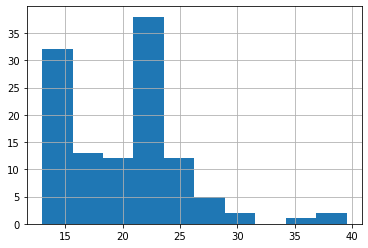

In [36]:
y1_sample = mpg[mpg.year == 1999].fuel_efcy
y1_sample.hist()

<AxesSubplot:>

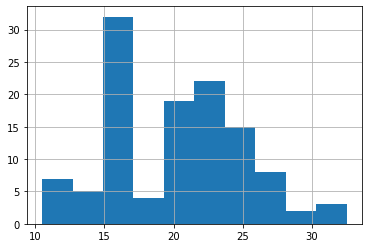

In [37]:
y2_sample = mpg[mpg.year == 2008].fuel_efcy
y2_sample.hist()

In [38]:
alpha = .05

In [39]:
print(y1_sample.var())
print(y2_sample.var())

27.122605363984682
24.097480106100797


In [40]:
t, p = stats.ttest_ind(y1_sample, y2_sample, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

In [41]:
p > alpha

True

##### b. Are compact cars more fuel-efficient than the average car?

- Null Hypothesis H0 ====> μa==μb ====> There is no difference in fuel-efficiency in compact cars 2008 vs the average car

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb There is a difference in fuel-efficiency in compact cars vs the average car

    ##### Assumptions verification

- Independent Samples. No observations in year 1999 exist in year 2008

- At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

- Unequal Variances

In [47]:
mpg[mpg['class'] == 'compact'].fuel_efcy.mean()

24.21276595744681

- average car average mileage

In [48]:
average_car_mpg = mpg[]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [ ]:
mpg[mpg['class'] == 'compact'].fuel_efcy.mean()